<a href="https://colab.research.google.com/github/i-wild/Python_Ejercicios/blob/master/velocidadSalidaDeRampa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CÁLCULO DE LA VELOCIDAD DE SALIDA DE LA RAMPA
Esta formula sirve para conocer la velocidad mínima
a la que debes salir de la rampa, asegurando así la llegada al recibidor.

⚠️ AVISO IMPORTANTE:

Este cálculo solo estima la velocidad mínima necesaria para alcanzar 
el recibidor,pero no garantiza un aterrizaje seguro.

La ejecución del salto depende de otros factores como la experiencia 
del ciclista, la configuración de la suspensión, el tipo de bicicleta, 
el recorrido de la horquilla y shock, la presión de las llantas y 
la calidad de los componentes.

Usa esta información bajo tu propio riesgo.
=== CÁLCULO DE VELOCIDAD PARA SALTO EN RAMPA ===
Ingresa la distancia horizontal al recibidor (m): 5
Ingresa la diferencia de altura entre la rampa y el recibidor (m): 0
Ingresa el ángulo de la rampa (grados): 50
+------------------+----------+------------+
| Tipo             | m/s      | km/h       |
+==================+==========+============+
| Velocidad mínima | 7.06 m/s | 25.41 km/h |
+------------------+----------+------------+
| Velocidad segura | 7.76 m/s | 27.95 km/h |
+------------------+----------+------------+


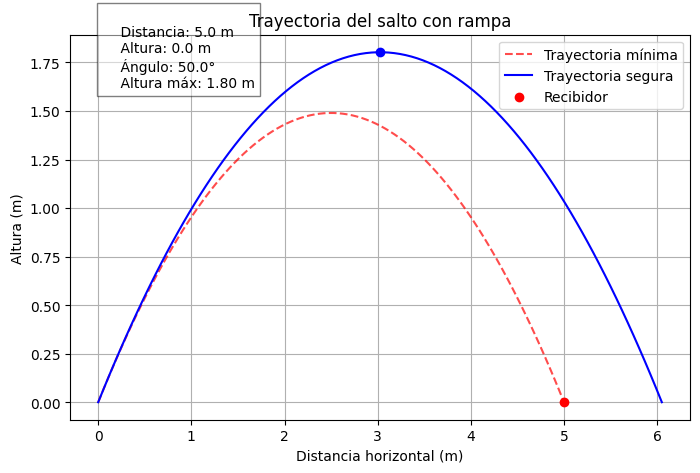

In [45]:
import math
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

def calcular_velocidad_salida(d, h, theta, k=1.1, g=9.81):
    """Calcula la velocidad mínima segura de salida de la rampa."""
    theta_rad = math.radians(theta)
    denominador = 2 * math.cos(theta_rad)**2 * (d * math.tan(theta_rad) - h)

    if denominador <= 0:
        return None

    v0 = math.sqrt((g * d**2) / denominador)
    v_seguro = k * v0
    return v0, v_seguro

def calcular_altura_maxima(v0, theta, g=9.81):
    """Calcula la altura máxima alcanzada en la trayectoria."""
    theta_rad = math.radians(theta)
    return (v0**2 * math.sin(theta_rad)**2) / (2 * g)

def graficar_trayectoria(v0, v0_seguro, theta, d, h, g=9.81, v_manual=None):
    """Genera la gráfica de la trayectoria con opciones adicionales."""
    theta_rad = math.radians(theta)
    t_total = (2 * v0 * math.sin(theta_rad)) / g
    t = np.linspace(0, t_total, num=100)

    # Trayectoria velocidad mínima
    x = v0 * np.cos(theta_rad) * t
    y = v0 * np.sin(theta_rad) * t - (0.5 * g * t**2)

    # Trayectoria velocidad segura
    t_seguro = (2 * v0_seguro * math.sin(theta_rad)) / g
    t_s = np.linspace(0, t_seguro, num=100)
    x_seguro = v0_seguro * np.cos(theta_rad) * t_s
    y_seguro = v0_seguro * np.sin(theta_rad) * t_s - (0.5 * g * t_s**2)

    # Altura máxima
    h_max = calcular_altura_maxima(v0_seguro, theta)
    x_h_max = (v0_seguro * np.cos(theta_rad)) * (v0_seguro * math.sin(theta_rad) / g)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'r--', label="Trayectoria mínima", alpha=0.7)
    plt.plot(x_seguro, y_seguro, 'b-', label="Trayectoria segura")
    plt.scatter(d, h, color="red", label="Recibidor", zorder=3)
    plt.scatter(x_h_max, h_max, color="blue", zorder=3)  # Punto de altura máxima

    # Datos en recuadro
    info_text = f"""
    Distancia: {d} m
    Altura: {h} m
    Ángulo: {theta}°
    Altura máx: {h_max:.2f} m"""
    plt.text(0.05, max(y_seguro)*0.9, info_text, fontsize=10, color="black",
             bbox=dict(facecolor='white', alpha=0.5))

    plt.xlabel("Distancia horizontal (m)")
    plt.ylabel("Altura (m)")
    plt.title("Trayectoria del salto con rampa")
    plt.legend()
    plt.grid()
    plt.show()

# Disclaimer con saltos de línea
print("⚠️ AVISO IMPORTANTE:\n")
print("Este cálculo solo estima la velocidad mínima necesaria para alcanzar \n"
      "el recibidor,pero no garantiza un aterrizaje seguro.\n")
print("La ejecución del salto depende de otros factores como la experiencia \n"
      "del ciclista, la configuración de la suspensión, el tipo de bicicleta, \n"
      "el recorrido de la horquilla y shock, la presión de las llantas y \n"
      "la calidad de los componentes.\n")
print("Usa esta información bajo tu propio riesgo.")

# Pedir datos al usuario
print("=== CÁLCULO DE VELOCIDAD PARA SALTO EN RAMPA ===")
d = float(input("Ingresa la distancia horizontal al recibidor (m): "))
h = float(input("Ingresa la diferencia de altura entre la rampa y el recibidor (m): "))
theta = float(input("Ingresa el ángulo de la rampa (grados): "))

resultado = calcular_velocidad_salida(d, h, theta)

if resultado:
    v_m_s, v_seguro = resultado

    # Mostrar resultados en tabla
    table_data = [["Velocidad mínima", f"{v_m_s:.2f} m/s", f"{v_m_s * 3.6:.2f} km/h"],
                  ["Velocidad segura", f"{v_seguro:.2f} m/s", f"{v_seguro * 3.6:.2f} km/h"]]
    print(tabulate(table_data, headers=["Tipo", "m/s", "km/h"], tablefmt="grid"))

    # Advertencias
    if v_seguro * 3.6 >= 150:
        print("⛔ NO es seguro realizar este salto en bicicleta. NO INTENTARLO.")
    elif v_seguro * 3.6 > 50:
        print("⚠️ Rampa profesional. Ajusta suspensión antes de intentarlo.")
    elif v_seguro * 3.6 > 35:
        print("⚠️ Velocidad alta. Se recomienda experiencia previa.")

    # Generar gráfica
    graficar_trayectoria(v_m_s, v_seguro, theta, d, h)

    # Preguntar por velocidad manual (comentado)
    # while True:
    #     opcion = input("¿Quieres ingresar una velocidad manual? (s/n): ").strip().lower()
    #     if opcion == 's':
    #         v_manual = float(input("Ingresa la velocidad deseada en m/s: "))
    #         graficar_trayectoria(v_m_s, v_seguro, theta, d, h, v_manual)
    #     elif opcion == 'n':
    #         break
    #     else:
    #         print("Por favor, ingresa 's' o 'n'.")
else:
    print("⚠️ El salto no es seguro con los valores ingresados. Considera modificar el ángulo o distancia.")
    input("Presiona Enter para salir...")
